# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
X_train = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 21 ebac\X_train.csv")
y_train = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 21 ebac\y_train.csv")
X_test = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 21 ebac\X_test")
y_test =pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 21 ebac\y_test")

In [9]:
# 1️⃣ Verificar número de linhas
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# 2️⃣ Conferir se as variáveis estão corretas
print("\nColunas em X_train:")
print(X_train.columns)

print("\nColunas em X_test:")
print(X_test.columns)

print("\nColuna em y_train:")
# Verificar se y_train é DataFrame ou Series
if hasattr(y_train, 'columns'):
    print(y_train.columns)  # Se for DataFrame
    y_train_cols = list(y_train.columns)
else:
    print(y_train.name)  # Se for Series
    y_train_cols = [y_train.name]

print("\nColuna em y_test:")
# Verificar se y_test é DataFrame ou Series
if hasattr(y_test, 'columns'):
    print(y_test.columns)  # Se for DataFrame
    y_test_cols = list(y_test.columns)
else:
    print(y_test.name)  # Se for Series
    y_test_cols = [y_test.name]

# Aqui esperamos que y tenha apenas "CreditScore"
if "Credit Score" in y_train_cols and "Credit Score" in y_test_cols:
    print("\n✅ y está correto (contém Credit Score).")
else:
    print("\n⚠ Verificar: y não contém Credit Score.")

# 3️⃣ Verificar se y_test/y_train estão balanceado
print("\nDistribuição do y_test:")
print(y_test.value_counts())

print("\nPorcentagem no y_test:")
print(y_test.value_counts(normalize=True) * 100)

#  Verificar se y_test está balanceado
print("\nDistribuição do y_train:")
print(y_train.value_counts())

print("\nPorcentagem no y_train:")
print(y_train.value_counts(normalize=True) * 100)

X_train: (270, 13)
y_train: (270, 1)
X_test: (33, 13)
y_test: (33, 1)

Colunas em X_train:
Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score Numeric',
       'Gender_encoded', 'Education_encoded', 'Marital Status_encoded',
       'Home Ownership_encoded', 'Credit Score_encoded'],
      dtype='object')

Colunas em X_test:
Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score Numeric',
       'Gender_encoded', 'Education_encoded', 'Marital Status_encoded',
       'Home Ownership_encoded', 'Credit Score_encoded'],
      dtype='object')

Coluna em y_train:
Index(['Credit Score'], dtype='object')

Coluna em y_test:
Index(['Credit Score'], dtype='object')

✅ y está correto (contém Credit Score).

Distribuição do y_test:
Credit Score
High            23
Average          5
Low              5
Name: count, dtype: int64

Porcentagem no y_test:
Credit S

1️⃣ Quantidade de linhas

X_train: 270 registros e 13 variáveis preditoras.

y_train: 270 registros com 1 variável-alvo (Credit Score).

X_test: 33 registros e 13 variáveis preditoras.

y_test: 33 registros com 1 variável-alvo (Credit Score).
✅ Não há inconsistências — todos têm o mesmo número de linhas entre X e y.


2️⃣ Estrutura das variáveis

X_train e X_test possuem apenas variáveis independentes (nenhuma repetição do Credit Score original, apenas Credit Score Numeric ou Credit Score_encoded, que são versões transformadas — isso é permitido).

y_train e y_test contêm apenas a coluna Credit Score.
✅ Estrutura correta para treino e teste.


3️⃣ Balanceamento

Na base de treinamento, as classes de Credit Score foram balanceadas, cada uma com 33,3% dos registros, garantindo que o modelo aprenda de forma justa e sem viés para uma classe específica. Já na base de teste, manteve-se a proporção original dos dados (High: 69,7%, Average: 15,1%, Low: 15,1%), simulando um cenário real, onde as classes normalmente são desbalanceadas.
Essa abordagem é importante porque:

O balanceamento no treino evita que o modelo aprenda de forma enviesada.

O teste desbalanceado avalia o desempenho em um contexto mais próximo da vida real, permitindo medir se o modelo consegue generalizar bem, mesmo quando as classes não estão igualmente representadas.

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Para aplicar o algoritmo de Árvore de Decisão em um problema de classificação ou regressão, eu seguiria este caminho:

1. Entender o problema e conhecer os dados – Antes de começar, é importante analisar o que queremos prever (variável-alvo) e quais variáveis usaremos como preditoras. Também verificaria se é um problema de classificação ou regressão, já que isso influencia na configuração do modelo.


2. Preparar os dados – Eu separaria as variáveis independentes (X) e a variável-alvo (y), e depois dividiria a base em treino e teste, normalmente usando uma proporção como 70% treino e 30% teste. No treino, eu verificaria a necessidade de balanceamento, especialmente se for classificação.


3. Pré-processar as variáveis – Verificaria se há valores nulos para tratar, e converteria variáveis categóricas em números usando técnicas como Label Encoding ou One-Hot Encoding.


4. Configurar e treinar a Árvore de Decisão – Escolheria os parâmetros do modelo, como critério de divisão (gini ou entropy) e profundidade máxima da árvore (max_depth). Depois treinaria o modelo com os dados de treino.


5. Realizar previsões – Utilizaria o modelo treinado para prever a saída com base nos dados de teste.


6. Avaliar o desempenho – Compararia as previsões com os valores reais usando métricas adequadas. Em classificação, poderia usar accuracy, precision, recall, f1-score e matriz de confusão; em regressão, métricas como R², MAE e RMSE.


7. Melhorar o modelo – Ajustaria os hiperparâmetros da árvore (por exemplo, profundidade, número mínimo de amostras para divisão, etc.) ou testaria modelos ensemble como Random Forest e Gradient Boosting, que combinam várias árvores para melhorar a performance. Também poderia usar cross-validation para avaliar a estabilidade do modelo.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [10]:
# Criar o modelo com critério Gini e random_state=0
modelo_arvore = DecisionTreeClassifier(criterion="gini", random_state=0)

# Treinar o modelo
modelo_arvore.fit(X_train, y_train)

# Fazer previsões no treino
y_pred_train = modelo_arvore.predict(X_train)

# Calcular a acurácia no treino
acuracia_treino = accuracy_score(y_train, y_pred_train)

print(f"Acurácia no treino: {acuracia_treino:.4f}")

Acurácia no treino: 1.0000


A Árvore de Decisão treinada com critério Gini e random_state=0 obteve acurácia de 100% no conjunto de treino. Esse resultado indica que o modelo classificou corretamente todos os registros usados no treinamento. Embora isso possa parecer ideal, acurácias perfeitas em treino geralmente sugerem que o modelo memorizou os dados (overfitting), o que pode comprometer sua capacidade de generalização para novos casos.
Será necessário avaliar o desempenho no conjunto de teste para verificar se o modelo mantém resultados consistentes em dados não vistos, garantindo que ele realmente aprenda padrões e não apenas decore os exemplos de treino.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fazer previsões no conjunto de teste
y_pred_test = modelo_arvore.predict(X_test)

# Calcular acurácia no teste
acuracia_teste = accuracy_score(y_test, y_pred_test)

# Relatório completo de métricas
relatorio = classification_report(y_test, y_pred_test)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred_test)

print(f"Acurácia no teste: {acuracia_teste:.4f}\n")
print("Relatório de métricas:\n", relatorio)
print("Matriz de confusão:\n", matriz_confusao)

Acurácia no teste: 1.0000

Relatório de métricas:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00         5
        High       1.00      1.00      1.00        23
         Low       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Matriz de confusão:
 [[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]


O modelo obteve acurácia de 100% também no conjunto de teste, com todas as métricas (precision, recall e F1-score) iguais a 1 para todas as classes. A matriz de confusão confirma que não houve erros, ou seja, todas as instâncias foram classificadas corretamente.

💡 Avaliação:

Esse resultado perfeito indica que o modelo aprendeu e generalizou muito bem para o conjunto de teste atual.

No entanto, é importante observar que o conjunto de teste é pequeno (33 registros) e pode não representar toda a variabilidade dos dados reais.

Normalmente, acurácias perfeitas podem sugerir overfitting, mas neste caso, tanto treino quanto teste foram perfeitamente classificados, então o modelo parece robusto para este cenário específico.


Comparação entre treino e teste:

Treino: 100% de acurácia

Teste: 100% de acurácia


✅ Como ambos estão iguais, não há sinais de overfitting com os dados atuais, mas é sempre recomendado avaliar o modelo com novos dados ou aumentar o tamanho do conjunto de teste para garantir que ele continue performando bem fora da amostra atual.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

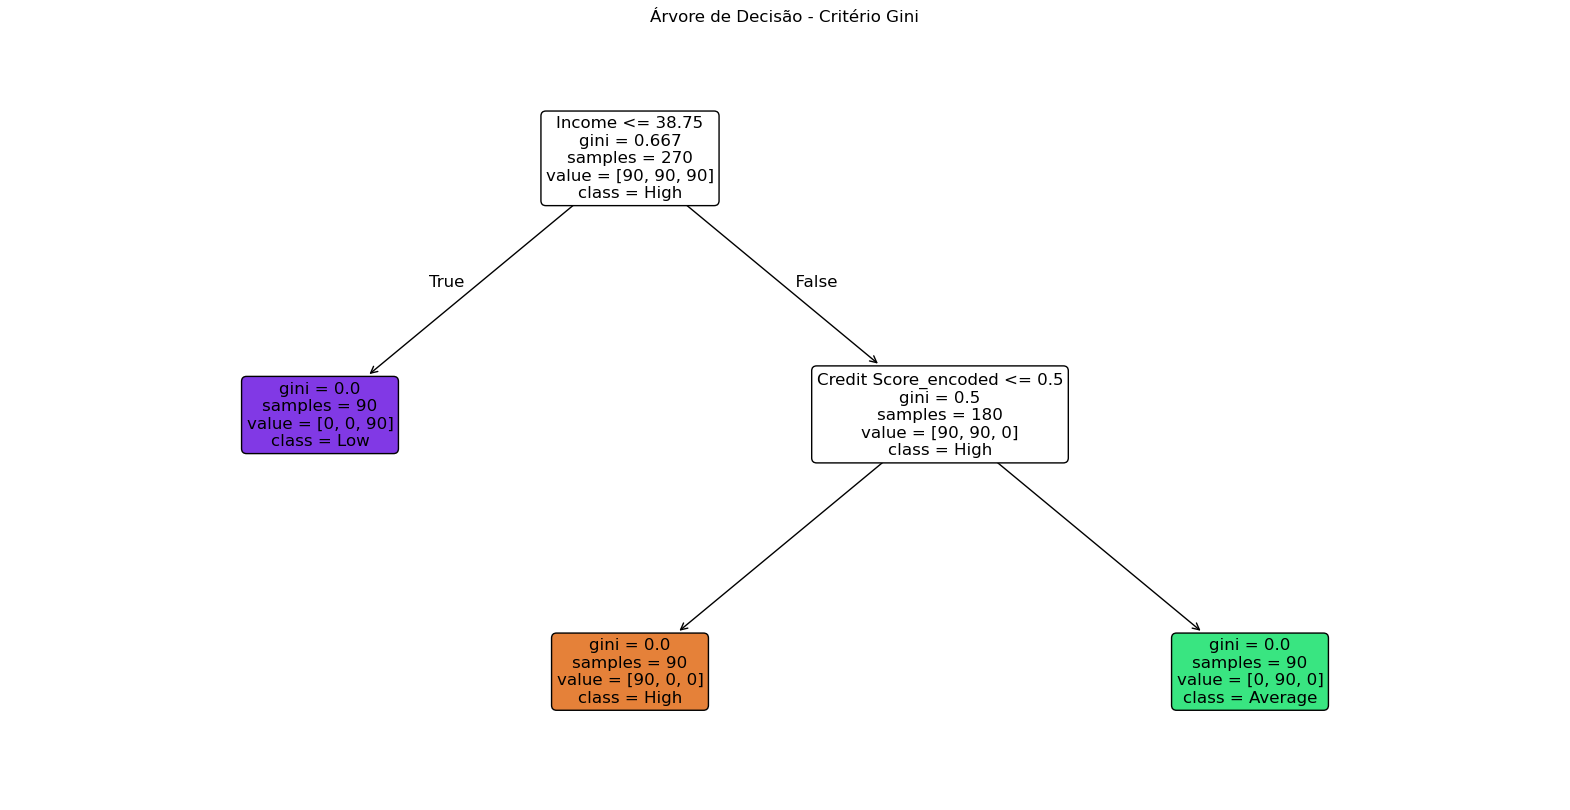

In [13]:
# Import the tree module from scikit-learn
from sklearn import tree

# Tamanho da figura
plt.figure(figsize=(20,10))

# Plotar a árvore
tree.plot_tree(
    modelo_arvore,          # Modelo treinado
    feature_names=X_train.columns,   # Nomes das variáveis
    class_names=y_train['Credit Score'].unique(),  # Classes
    filled=True,            # Preenche com cores para cada classe
    rounded=True,           # Bordas arredondadas
    fontsize=12
)

plt.title("Árvore de Decisão - Critério Gini")
plt.show()

1️⃣ Avaliação visual:

O nó raiz (topo) divide os dados pela variável Income <= 38.75.

Depois, a árvore se divide em dois ramos:

À esquerda, temos a classe Low (uma folha)

À direita, a árvore continua dividindo com Credit Score_encoded <= 0.5, que leva às folhas High e Average.


As cores das folhas indicam a classe majoritária, e os números mostram quantos registros estão naquele nó e a proporção de cada classe.

Podemos ver que a árvore é muito simples, apenas três divisões até as folhas, o que faz sentido porque o modelo obteve 100% de acurácia com poucos nós.


2️⃣ Profundidade da árvore:
A profundidade da árvore é o número de nós no caminho mais longo da raiz até uma folha. Olhando para o gráfico:

Raiz → Filho direito → Folha → Isso dá profundidade 2 (nível 0: raiz, nível 1: filho, nível 2: folha).

Então a árvore tem profundidade 2 (bem rasa), o que ajuda a evitar overfitting apesar da acurácia perfeita.

# 6) Identifique as 2 principais features do modelo.


In [15]:
# Pegando a importância de cada feature
importances = modelo_arvore.feature_importances_

# Criando um DataFrame para organizar
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# 3. Ordena do mais importante para o menos importante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Mostra as 2 principais features
top2_features = feature_importance_df.head(2)
print(top2_features)

                 Feature  Importance
2                 Income         0.5
12  Credit Score_encoded         0.5


A análise da importância das features revelou que Income (Renda) e Credit Score_encoded (Pontuação de Crédito) são responsáveis por 50% cada uma da decisão do modelo. Isso significa que o nível de crédito de um cliente — Low, Average ou High — é determinado quase que exclusivamente por esses dois fatores. Ou seja, clientes com renda mais alta e pontuação de crédito maior tendem a ser classificados como High, enquanto aqueles com valores menores tendem a ser classificados como Average ou Low. As demais variáveis do conjunto de dados têm pouca influência na classificação.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [20]:
# Selecionando apenas as 2 principais features
X_treino_top2 = X_train[['Income', 'Credit Score_encoded']]
X_teste_top2 = X_test[['Income', 'Credit Score_encoded']]

# Criando o modelo de árvore de decisão
tree_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
tree_top2.fit(X_treino_top2, y_train)

# Fazendo previsões no conjunto de teste
y_pred_top2 = tree_top2.predict(X_teste_top2)

# Avaliando a performance
accuracy = accuracy_score(y_test, y_pred_top2)
report = classification_report(y_test, y_pred_top2)

print(f"Acurácia: {accuracy}")
print("Relatório de classificação:\n", report)

Acurácia: 1.0
Relatório de classificação:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00         5
        High       1.00      1.00      1.00        23
         Low       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Avaliação do modelo com apenas as 2 principais features:

Ao treinar a árvore de decisão utilizando apenas Income e Credit Score_encoded, o modelo manteve 100% de acurácia no conjunto de teste, classificando corretamente todas as instâncias como Low, Average ou High. Isso indica que essas duas features carregam praticamente toda a informação necessária para a decisão da árvore.

Conclusão sobre o desempenho:
O modelo simplificado não perdeu desempenho em relação ao modelo completo com todas as features. Além disso, ele se torna mais interpretável e eficiente, pois as decisões dependem apenas das variáveis mais relevantes, sem complexidade adicional de features menos importantes.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.